## Regresion Lineal

Carga el archivo `data_regression.csv` y fittea un modelo lineal simple usando cada variable $X$ primero, y después un modelo linear múltiple usando $X1$, $X2$ y $X3$ al mismo tiempo.

Calcula las medidas MSE y Coeficiente R2 para evaluar cada modelo.

In [2]:
# Importamos las librerías necesarias

# import sys
# !{sys.executable} -m pip install numpy pandas matplotlib sklearn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#Y ahora, usando Scikit-Learn:
from sklearn.linear_model import LinearRegression # Importamos el módulo que contiene el algorimto de regresión lineal
from sklearn.model_selection import train_test_split

# Evaluacion del modelo para X1
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [12]:
# Importar el archivo data_regression.csv
df_regression = pd.read_csv("../data/data_regression.csv", sep=",")

In [13]:
# Asignar los valores de columnas a cada variable
y = df_regression.y
X1 = df_regression.X1
X2 = df_regression.X2
X3 = df_regression.X3

In [14]:
#Y ahora, usando Scikit-Learn:
linear_model = LinearRegression() # Instanciamr un objeto de la clase LinearRegression. 
#Aquí estamos creando nuestro modelo predictivo 'linear_model'
# Entrenamos el modelo
linear_model.fit(X1.values.reshape(-1,1), y)




LinearRegression()

In [15]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y 
#la ordenada al origen que calculó
print('La pendiente obtenida con Sklearn es :', linear_model.coef_)
print('La ordenada al origen obtenida con Sklearn es:', linear_model.intercept_)

La pendiente obtenida con Sklearn es : [-0.4478604]
La ordenada al origen obtenida con Sklearn es: 5.488195226319328


In [16]:
# Instanciamos un modelo de regresión lineal, entrenando el modelo y haciendo un `train_test_split`.
X1 = X1.values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.30, random_state=42) 
# Separamos nuestros datos, dejando un 30% para testear

print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)


(1050, 1) (1050,) (450, 1) (450,)


In [18]:
# Entrenamos el modelo

linear_model.fit(X1_train, y1_train)

LinearRegression()

In [19]:
# Predecimos las etiquetas de salida Y1 en el subset de entrenamiento y en el subset de testeo
#para cada una de las instancias

y1_train_pred = linear_model.predict(X1_train) # subset de entrenamiento
y1_test_pred = linear_model.predict(X1_test) #subset de testeo

In [20]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y 
#la ordenada al origen que calculó

print('La pendiente es :', linear_model.coef_)
print('La ordenada al origen es:', linear_model.intercept_)

La pendiente es : [-0.44618404]
La ordenada al origen es: 5.489769168575827


In [21]:
a = linear_model.coef_
b = linear_model.intercept_
Y1 = a*X1 + b

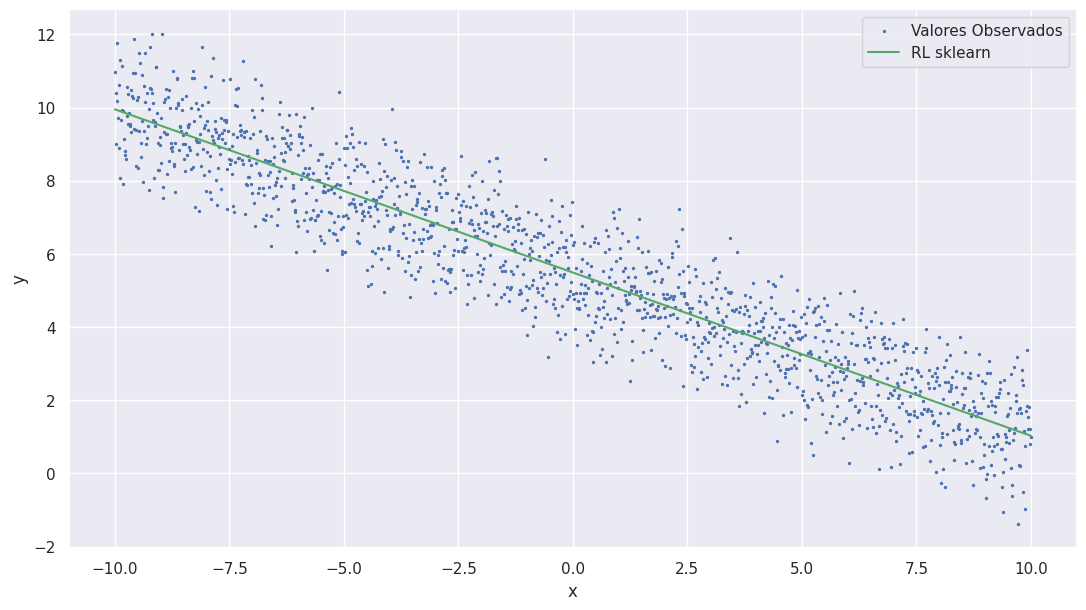

In [22]:
plt.figure(figsize = (13,7))

plt.scatter(X1,y, s = 2, label= 'Valores Observados')

plt.plot(X1,linear_model.predict(X1),label ='RL sklearn', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Raíz del error cuadrático medio en Train: 1.0095738708684368
Raíz del error cuadrático medio en Test: 0.9783822079959493


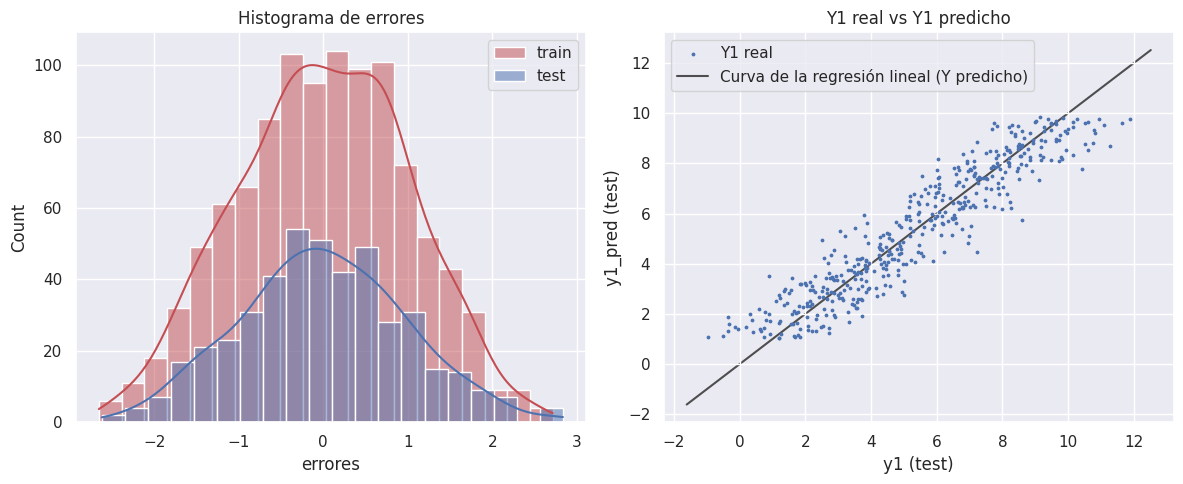

In [24]:
# Evaluacion del modelo para X1
rmse_train = (mean_squared_error(y1_train, y1_train_pred, squared = False))
rmse_test = (mean_squared_error(y1_test, y1_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.histplot(y1_train - y1_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
sns.histplot(y1_test - y1_test_pred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y1 real vs Y1 predicho')
ax.scatter(y1_test,y1_test_pred, s =3, label = 'Y1 real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y1 (test)')
plt.ylabel('y1_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Ahora calcularemos el coeficiente de determinación de nuestro modelo
# from sklearn.metrics import r2_score 

r2 = r2_score(y1_test, y1_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: 0.8748049364266249


In [26]:
# Pasamos a Regresion Lineal Multiple
X1 = df_regression['X1'].values
X2 = df_regression['X2'].values
X3 = df_regression['X3'].values
y = df_regression['y'].values
linear_modelX1 = LinearRegression() 
linear_modelX1.fit(X1.reshape(-1,1), y)
linear_modelX2 = LinearRegression() 
linear_modelX2.fit(X2.reshape(-1,1), y)
linear_modelX3 = LinearRegression() 
linear_modelX3.fit(X3.reshape(-1,1), y)


LinearRegression()

In [27]:
# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye dos atributos

X = np.vstack((X1, X2, X3)).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1050, 3) (1050,) (450, 3) (450,)


In [28]:
# Instanciamos nuestra regresión lineal y la entrenamos

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_)

Las pendientes del modelo de regresión lineal son: [-1.60091946e+12  2.05820473e+12 -2.65242300e+12]
La ordenada al origen del modelo de regresión lineal es: -29271309572179.336


Dado que hay 2 rectas casi paralelas, la ordenada al origen es demasiado grande